In [78]:
# Import all necessary packages
from google.colab import files
import pandas as pd
import io
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from scipy.stats import chi2
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
uploaded = files.upload()
df_BMI = pd.read_csv(io.BytesIO(uploaded['CHL5230-F23-Datathon #1-Dataset1.csv']))
df_BMI.head()

Saving CHL5230-F23-Datathon #1-Dataset1.csv to CHL5230-F23-Datathon #1-Dataset1.csv


,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


In [3]:
uploaded = files.upload()
df_lung = pd.read_csv(io.BytesIO(uploaded['CHL5230-F23-Datathon#1-Dataset2.csv']))
df_lung.head()

Saving CHL5230-F23-Datathon#1-Dataset2.csv to CHL5230-F23-Datathon#1-Dataset2.csv


,Age,Gender,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Severity
0,33,1,2,4,3,2,4,3,2,2,4,0
1,17,1,3,1,4,2,2,2,4,2,3,1
2,35,1,4,5,5,4,7,2,3,4,8,2
3,37,1,7,7,6,7,7,7,7,7,8,2
4,46,1,6,8,7,6,7,8,7,7,9,2


In [7]:
### Public Health Factors Influencing BMI
# Here, we want to focus on the factors that influence BMI, by using the machine
# learning techniques such as K-NN for classification and clustering, but BMI is
# a continuous variable, so we have to transform it to categorical data.
df_BMI.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


In [9]:
# Display basic descriptive statistics
print(df_BMI.describe())
# Check for missing values in the dataset, no missing value is found here.
print(df_BMI.isna().sum())

                Age  Calorie_Intake  Sugar_Intake  Physical_Activity  \
count  23535.000000    23535.000000  23535.000000       23535.000000   
mean      48.532993     2495.845634     64.824559          89.496707   
std       17.872736      577.798752     32.004657          52.120810   
min       18.000000     1500.000000     10.000000           0.000000   
25%       33.000000     1991.000000     37.000000          45.000000   
50%       48.000000     2495.000000     65.000000          90.000000   
75%       64.000000     2994.000000     93.000000         135.000000   
max       79.000000     3499.000000    119.000000         179.000000   

       Fast_Food_Frequency   Screen_Time        Height        Weight  \
count         23535.000000  23535.000000  23535.000000  23535.000000   
mean              2.018441      5.486127      1.650279     70.019142   
std               1.414634      3.454036      0.119714     15.016866   
min               0.000000      0.000000      1.196086     10.0

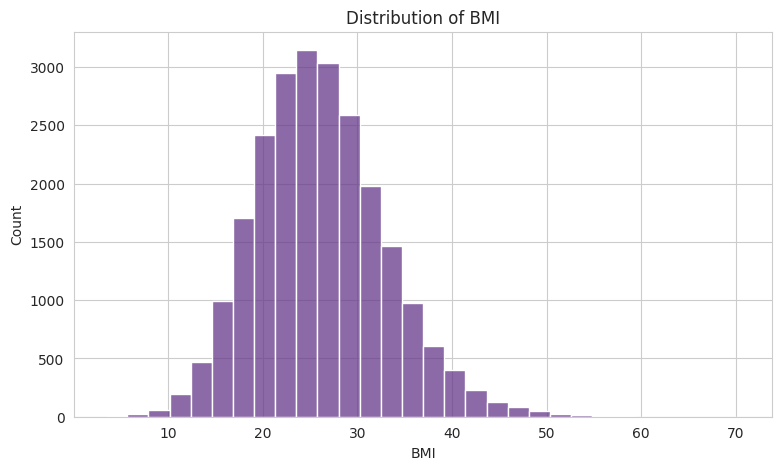

In [10]:
# First, check the distribution of BMI
# Follow a normal distribution
# Set the style for seaborn
sns.set_style('whitegrid')

# Create a histogram for the 'Age' feature
plt.figure(figsize=(9, 5))
sns.histplot(df_BMI['BMI'], bins=30, kde=False, color='#66378a')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.show()

In [11]:
# According to WHO BMI standard, we can cluster it into 4 different groups.
# Below 18.5 Underweight
# 18.5—24.9	Healthy Weight
# 25.0—29.9	Overweight
# 30.0 and Above	Obesity

# create a helper fucntion
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Healthy Weight"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obesity"


df_BMI['bmi_group'] = df_BMI['BMI'].apply(categorize_bmi)
df_BMI.head()
# Now, we have the label that we can apply when we use KNN

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,bmi_group
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343,Obesity
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877,Overweight
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417,Overweight
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720,Obesity
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685,Overweight


In [12]:
# We also need to make sure that rest of the data are numeric, convert Gender
# into a format that can be utilized by machine learning algorithms (0 or 1)
# Encoding 'Gender' column
le = LabelEncoder()
df_BMI['Gender'] = le.fit_transform(df_BMI['Gender'])  # Male: 1, Female: 0
df_BMI.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,bmi_group
0,56,0,3091,90,160,4,1,1.569070,81.199394,32.981343,Obesity
1,69,0,2090,106,27,0,9,1.629449,74.273566,27.973877,Overweight
2,46,1,2938,11,45,2,3,1.637726,71.453466,26.640417,Overweight
3,32,0,3022,48,112,1,8,1.514198,98.163045,42.813720,Obesity
4,60,0,2350,83,115,0,7,1.410559,57.323914,28.810685,Overweight


In [25]:
# Apply KNN

# We are aware that BMI is derived directly from two variables, height and weight,
# through computation. In this context, we are not interested in analyzing these
# two direct variables. Our analysis focuses on variables that indirectly influence
# BMI. Additionally, we intend to employ the K-Nearest Neighbors (K-NN) algorithm
# for computation. Therefore, we have transformed BMI, a continuous variable, into
# a categorical variable for analysis. We have categorized BMI values into four groups
# based on WHO standards: Underweight, Healthy Weight, Overweight, and Obesity.

# Split data into features and label
X = df_BMI[['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
            'Fast_Food_Frequency', 'Screen_Time']]
y = df_BMI['bmi_group']

# Split data into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add validation set here, as we discussed during the lecture.
# Now, we get 70% training dataset, 20% testing dataset and also 10% validation dataset.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(X_val.shape,y_val.shape)
print('Training dataset is', X_train.shape[0]/X.shape[0])
print('Testing dataset is', X_test.shape[0]/X.shape[0])
print('Validation dataset is', X_val.shape[0]/X.shape[0])

(16474, 7) (16474,)
(4707, 7) (4707,)
(2354, 7) (2354,)
Training dataset is 0.6999787550456766
Testing dataset is 0.2
Validation dataset is 0.10002124495432335


In [26]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=3)  # Setting K to 3 as an example
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[894 345 263  60]
 [717 293 187  47]
 [737 294 214  43]
 [336 134 123  20]]
                precision    recall  f1-score   support

Healthy Weight       0.33      0.57      0.42      1562
       Obesity       0.27      0.24      0.25      1244
    Overweight       0.27      0.17      0.21      1288
   Underweight       0.12      0.03      0.05       613

      accuracy                           0.30      4707
     macro avg       0.25      0.25      0.23      4707
  weighted avg       0.27      0.30      0.27      4707



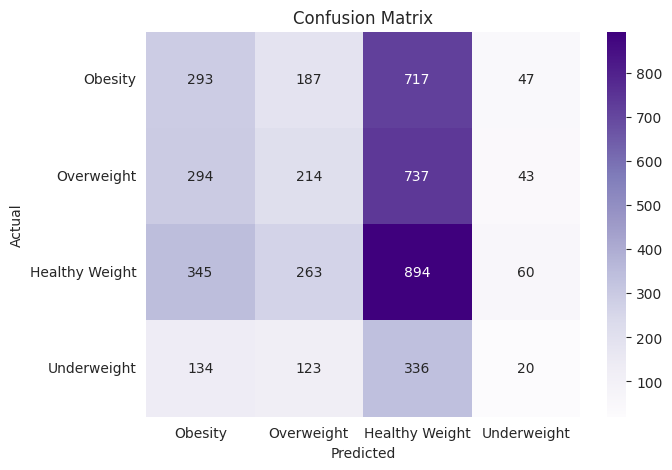

In [17]:
# Get unique classes
classes = df_BMI['bmi_group'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [55]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Setting K to 5 as an example
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[814 406 289  53]
 [652 326 207  59]
 [680 323 241  44]
 [300 157 133  23]]
                precision    recall  f1-score   support

Healthy Weight       0.33      0.52      0.41      1562
       Obesity       0.27      0.26      0.27      1244
    Overweight       0.28      0.19      0.22      1288
   Underweight       0.13      0.04      0.06       613

      accuracy                           0.30      4707
     macro avg       0.25      0.25      0.24      4707
  weighted avg       0.27      0.30      0.27      4707



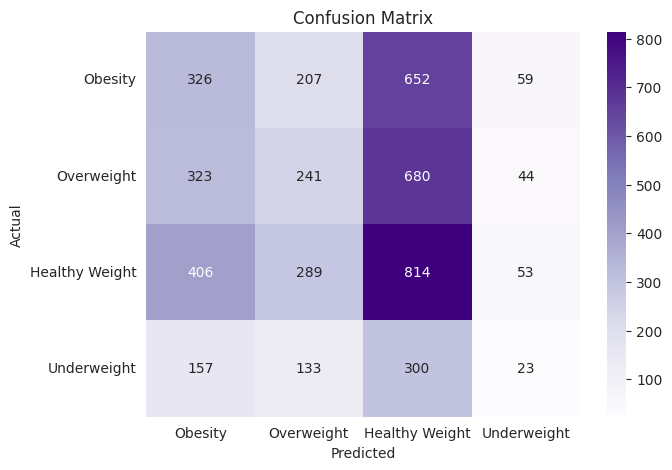

In [20]:
# Get unique classes
classes = df_BMI['bmi_group'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [84]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=10)  # Setting K to 10 as an example
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[840 376 311  35]
 [673 320 231  20]
 [703 315 248  22]
 [335 132 133  13]]
                precision    recall  f1-score   support

Healthy Weight       0.33      0.54      0.41      1562
       Obesity       0.28      0.26      0.27      1244
    Overweight       0.27      0.19      0.22      1288
   Underweight       0.14      0.02      0.04       613

      accuracy                           0.30      4707
     macro avg       0.26      0.25      0.23      4707
  weighted avg       0.28      0.30      0.27      4707



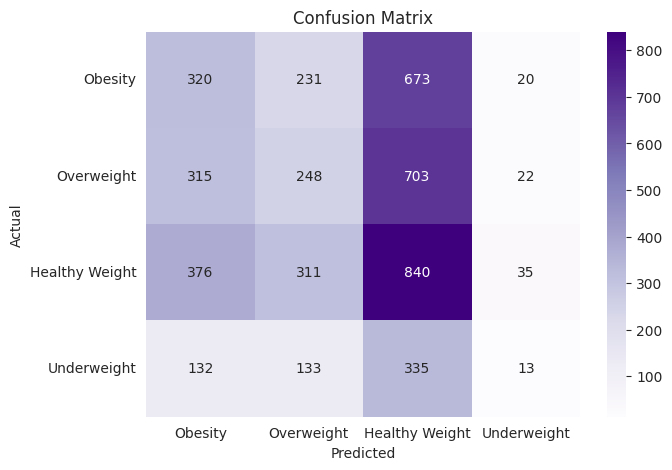

In [22]:
# Get unique classes
classes = df_BMI['bmi_group'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [81]:
k_values = range(1, 10)

# A list to keep track of the error rates for each k value.
errors = []

# Loop over k_values to train and test the KNN classifier
for k in k_values:
    # Initialize a KNN classifier with current k value.
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier on the training data.
    knn.fit(X_train, y_train)

    # Predict the labels for the test set.
    y_pred = knn.predict(X_test)

    # Calculate the error rate: 1 - accuracy.
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)

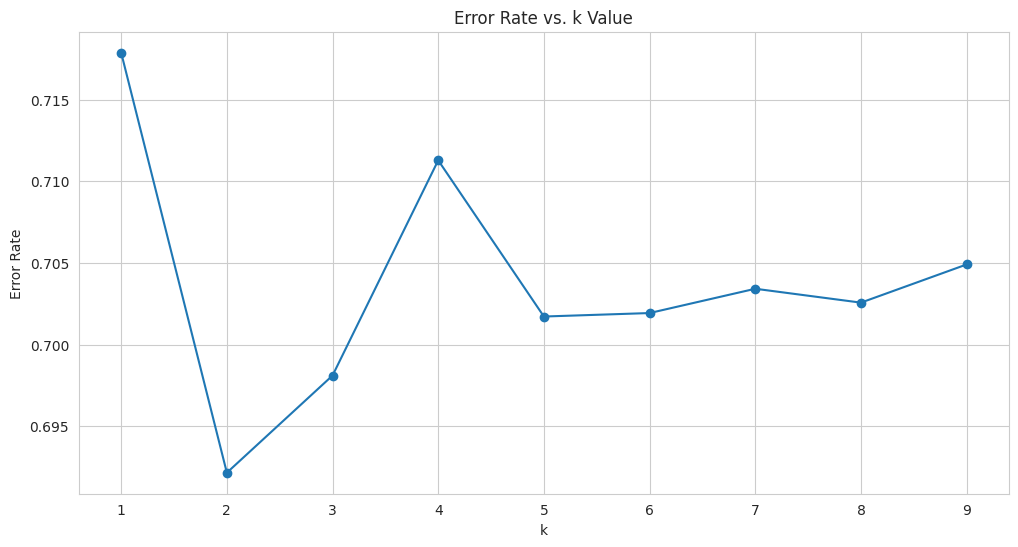

In [82]:
# Plotting
# This visualization helps in understanding the relationship between k value and the error rate.
plt.figure(figsize=(12, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Error Rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

From the code above, we should select K to be equal to 5. In comparison to the other two values of K, when K is equal to 5, the model achieves the highest F1-score. F1-score is typically preferred in situations where the model encounters class imbalance, as it simultaneously addresses the issues of precision and recall.

 We can observe from the above graph that even though the model exhibits the lowest error rate when K is equal to 2, we believe that when K equals 2, the model may be too sensitive to noise in the data. Beyond K equals 5, the overall error rate of the model tends to flatten, this aligns with the results we obtained through calculating the F1 score.

In [59]:
# Implement the model to the validation dataset.
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Setting K to 5 as an example
knn.fit(X_train, y_train)

# Predict using the validation data
y_pred = knn.predict(X_val)

# Evaluate the model
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[269 476   1   0]
 [233 419   3   0]
 [241 420   2   0]
 [106 184   0   0]]
                precision    recall  f1-score   support

Healthy Weight       0.32      0.36      0.34       746
       Obesity       0.28      0.64      0.39       655
    Overweight       0.33      0.00      0.01       663
   Underweight       0.00      0.00      0.00       290

      accuracy                           0.29      2354
     macro avg       0.23      0.25      0.18      2354
  weighted avg       0.27      0.29      0.22      2354



We can observe that both the F1-score and accuracy are relatively close to the results of the test dataset, despite their values being relatively small.

Simultaneously, within the validation dataset, no data points were classified into the 'Underweight' category. This may be attributed to the significantly smaller sample size of this category compared to the other three. There might not be a sufficient amount of data available for a meaningful analysis of this category. In the future, it might be worth considering a separate analysis for this category.

### **Some additional thoughts:**
Given our group's continuous interest in the impact of calorie intake on the body, and assuming a positive relationship between calorie intake and BMI, we are contemplating whether it is feasible to employ K-Means clustering to categorize calorie intake into different groups.

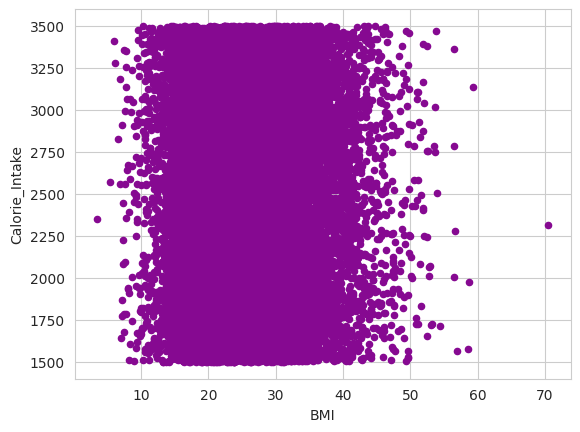

In [77]:
features = ['BMI', 'Calorie_Intake']
df_BMI[features].plot.scatter(x=features[0], y=features[1], color='#860991')
plt.show()

However, based on the above graph, it is challenging to discern distinct groups, as the data appears to be randomly scattered. Therefore, we believe that employing K-Means may not be particularly effective in separating the groups. Hence, we should remain committed to using the K-Nearest Neighbors (KNN) method for analysis.